In [209]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

In [210]:
housing = pd.read_csv(r"E:\TABLES\housing data-1.csv")
housing.head()

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
0,1,7,2003,856,SBrkr,1710,2,Attchd,2,548,NaN,NaN,208500
1,2,6,1976,1262,SBrkr,1262,2,Attchd,2,460,NaN,NaN,181500
2,3,7,2001,920,SBrkr,1786,2,Attchd,2,608,NaN,NaN,223500
3,4,7,1915,756,SBrkr,1717,1,Detchd,3,642,NaN,NaN,140000
4,5,8,2000,1145,SBrkr,2198,2,Attchd,3,836,NaN,NaN,250000


In [211]:
# remove any un necessary columns

del housing['Id']

In [212]:
housing.columns

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'Electrical', 'GrLivArea',
       'FullBath', 'GarageType', 'GarageCars', 'GarageArea', 'Fence',
       'MiscFeature', 'SalePrice'],
      dtype='object')

In [213]:
# how many row and columns

print('Rows', housing.shape[0])
print('Columns', housing.shape[1])

Rows 1418
Columns 12


In [214]:
# 5point summary

housing.describe().T

,count,mean,std,min,25%,50%,75%,max
OverallQual,1418.0,6.114245,1.385858,1.0,5.00,6.0,7.0,10.0
YearBuilt,1418.0,1971.600846,30.064293,1872.0,1954.00,1973.0,2001.0,2010.0
TotalBsmtSF,1418.0,1061.712271,437.277589,0.0,796.50,994.0,1303.5,6110.0
GrLivArea,1418.0,1519.645275,527.412584,334.0,1132.50,1468.5,1786.0,5642.0
FullBath,1418.0,1.565585,0.551127,0.0,1.00,2.0,2.0,3.0
GarageCars,1418.0,1.763752,0.755995,0.0,1.00,2.0,2.0,4.0
GarageArea,1418.0,472.617772,216.068677,0.0,324.25,478.0,576.0,1418.0
SalePrice,1418.0,182089.485896,79970.934085,34900.0,130000.00,164800.0,215000.0,755000.0


#### Assumptions:

* Columns SalePrice, GrLivAreA, GarageArea, TotalBsmtSF are right skewed and might have outliers.
* GarageCars, FullBath & OverallQual are Number categories.
* YearBuilt is the age of the property between 1872 to 2010.

In [215]:
housing.describe(include='object').T

,count,unique,top,freq
Electrical,1417,5,SBrkr,1300
GarageType,1275,6,Attchd,800
Fence,270,4,MnPrv,148
MiscFeature,52,4,Shed,47


* Most of the electrical is 'SrBrkr'(mode)
* Very few values in Fence and MiscFeature 

#### Draw heatmap to show the correlation b/w the features

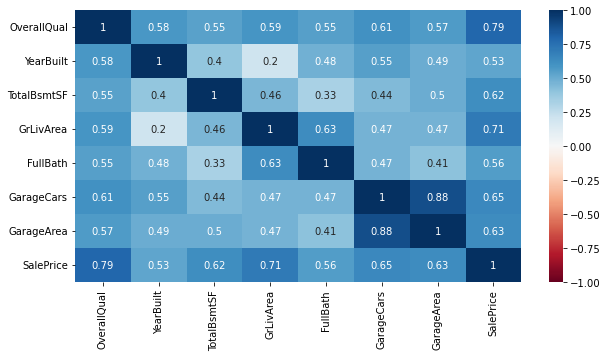

In [216]:
plt.figure(figsize = (10,5))

sns.heatmap(housing.corr(), annot=True, vmax=1, vmin=-1, cmap='RdBu')
plt.show()

#### Inferences:

* The target variable has max corr with overall quality, GrLvlArea & GarageArea
* These corr are highly affected by the outliers. Values of corr matrix might change after outlier treatment.

##### Seperate the category cols and number cols from the dataset and perform the *Univariate Analysis*

In [217]:
num_cols = ['YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'GarageArea', 'SalePrice']
cat_cols = ['OverallQual', 'FullBath', 'GarageCars', 'Electrical', 'GarageType', 'Fence', 'MiscFeature']

In [218]:
num_cols

['YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'GarageArea', 'SalePrice']

In [219]:
cat_cols

['OverallQual',
 'FullBath',
 'GarageCars',
 'Electrical',
 'GarageType',
 'Fence',
 'MiscFeature']

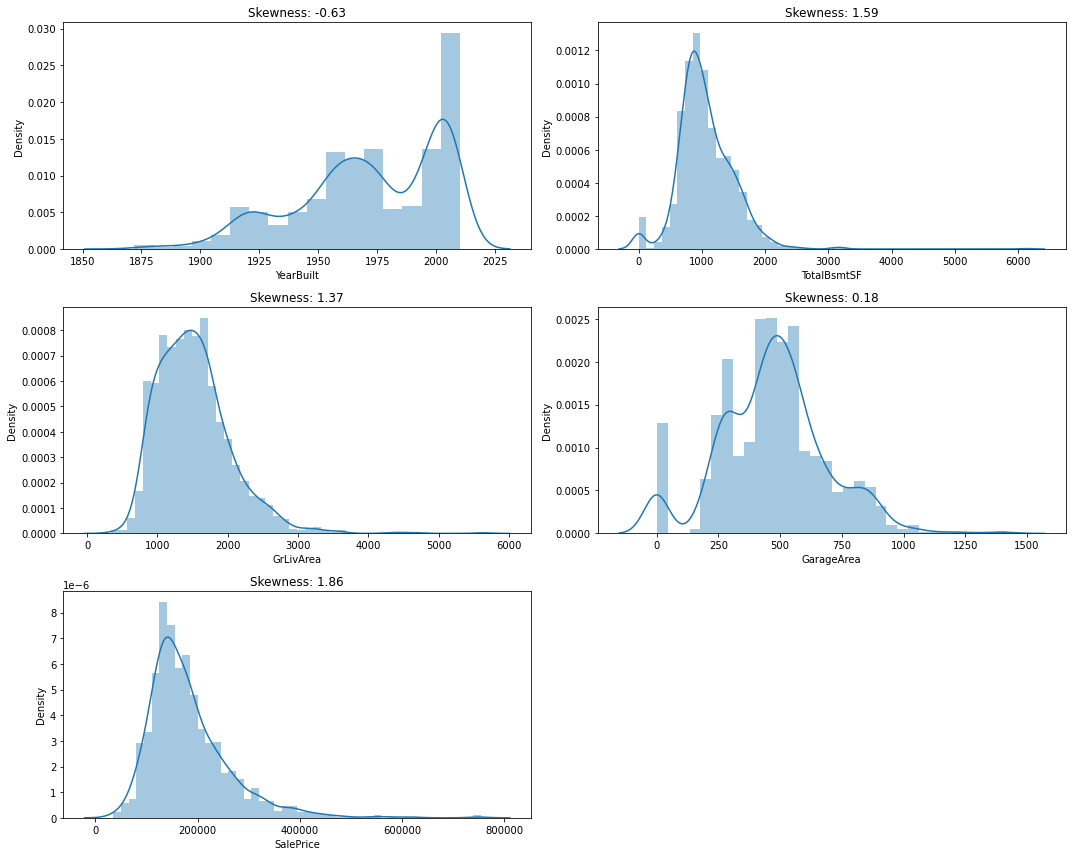

In [220]:
num_vars = ['YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'GarageArea', 'SalePrice']

nrows = 3
ncols = 2
repeater = 1

plt.figure(figsize = (15,12))
for i in num_vars:
    plt.subplot(nrows,ncols,repeater)
    sns.distplot(housing[i])
    plt.title(f'Skewness: {round(housing[i].skew(),2)}')
    repeater+=1
    
plt.tight_layout()
plt.show()

#### Inferences:

* 

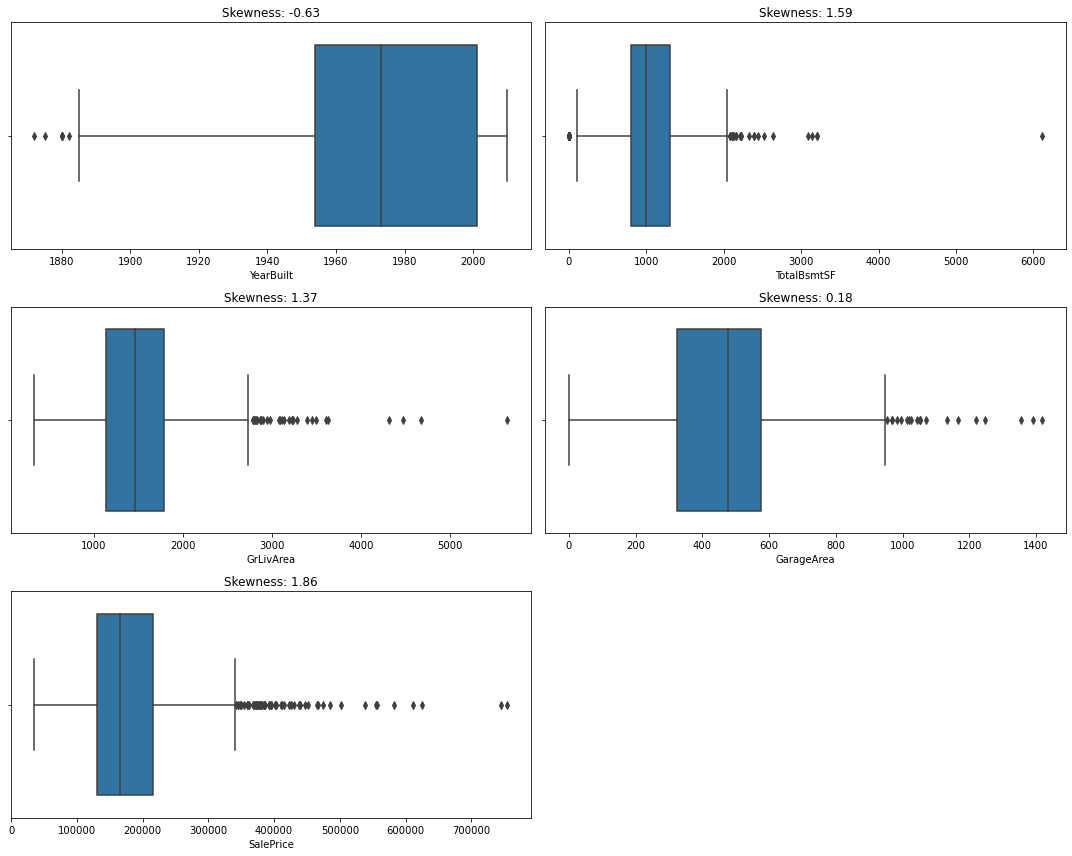

In [221]:
num_vars = ['YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'GarageArea', 'SalePrice']

nrows = 3
ncols = 2
repeater = 1

plt.figure(figsize = (15,12))
for i in num_vars:
    plt.subplot(nrows,ncols,repeater)
    sns.boxplot(housing[i])
    plt.title(f'Skewness: {round(housing[i].skew(),2)}')
    repeater+=1
    
plt.tight_layout()
plt.show()

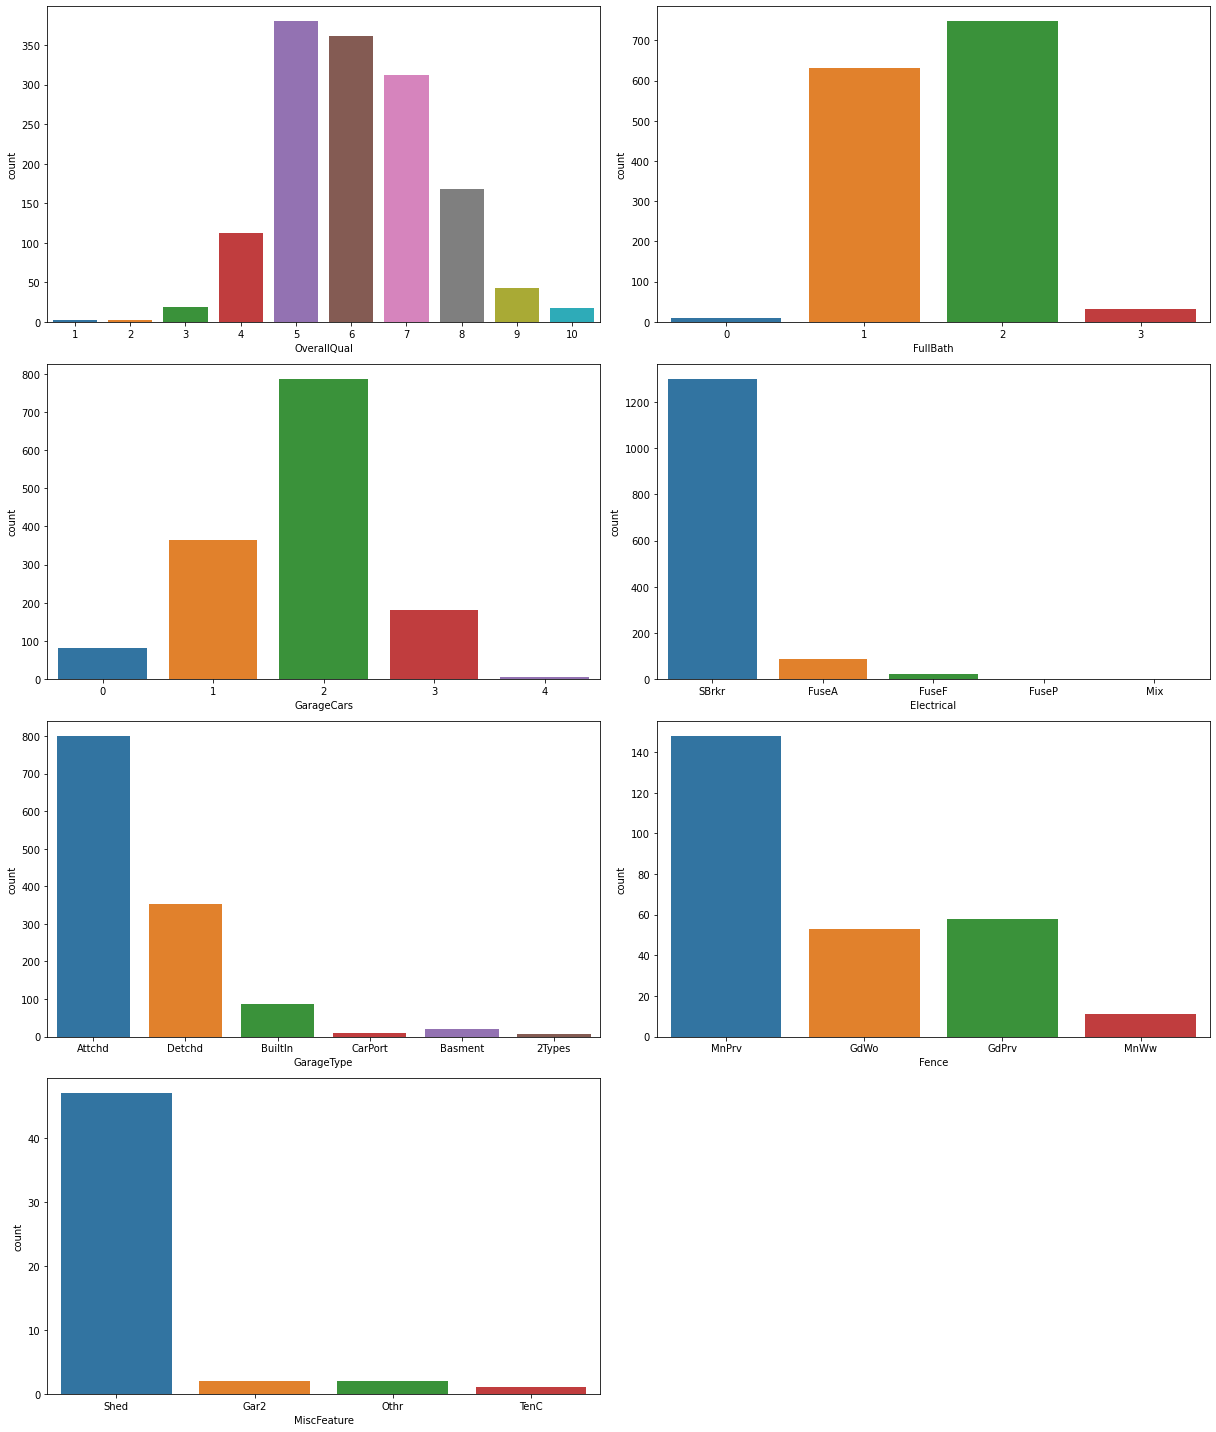

In [222]:
cats = ['OverallQual',
 'FullBath',
 'GarageCars',
 'Electrical',
 'GarageType',
 'Fence',
 'MiscFeature']


nrows = 4
ncols = 2
repeater = 1

plt.figure(figsize = (17,20))
for i in cats:
    plt.subplot(nrows,ncols,repeater)
    sns.countplot(housing[i])
    repeater+=1
    
    
plt.tight_layout()
plt.show()

#### Inferences

* Most of the houses have overall quality 5,6 & 7
* Almost all properties have 1 & 2 Fullbaths
* Most of the houses have facility to park 2 cars.
* Most of Garages are attached to the property


### BiVariate Analysis 

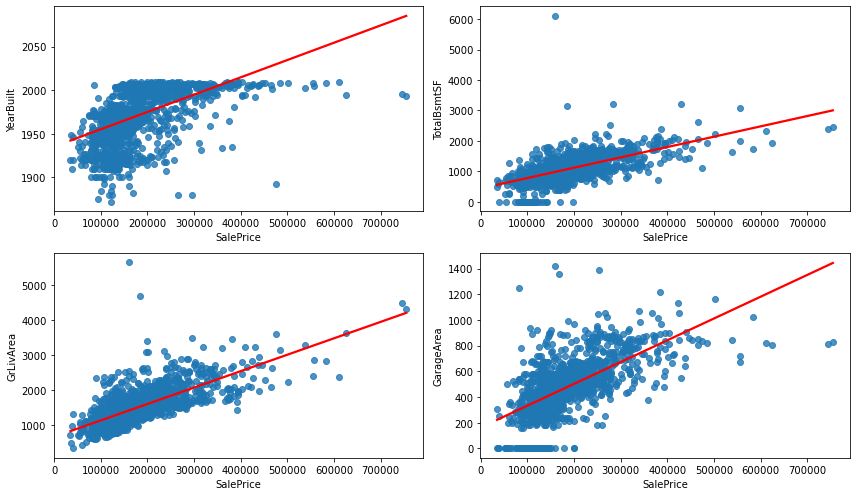

In [223]:
nrows = 2
ncols = 2
repeater = 1

plt.figure(figsize=(12,7))
for i in num_vars:
    if i != 'SalePrice':
        plt.subplot(nrows,ncols,repeater)
        sns.regplot(data= housing, x=housing['SalePrice'], y=housing[i], ci=0, line_kws={'color':'red'})
        repeater+=1
    
plt.tight_layout()
plt.show()

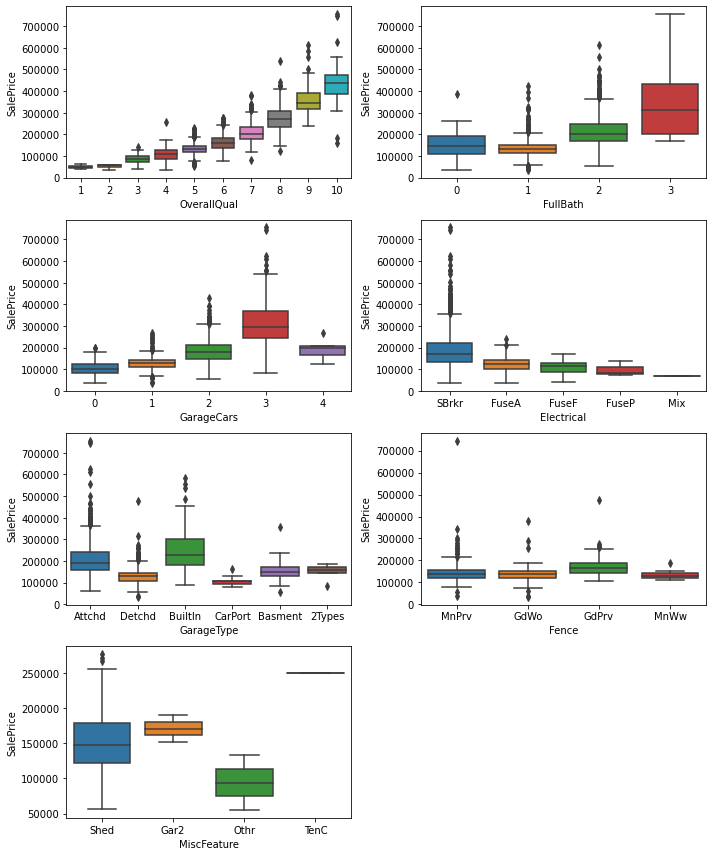

In [224]:
nrows = 4
ncols = 2
repeater = 1

plt.figure(figsize=(10,12))
for i in cats:
    plt.subplot(nrows,ncols,repeater)
    sns.boxplot(data= housing, x=i, y='SalePrice')
    repeater+=1
    
plt.tight_layout()
plt.show()

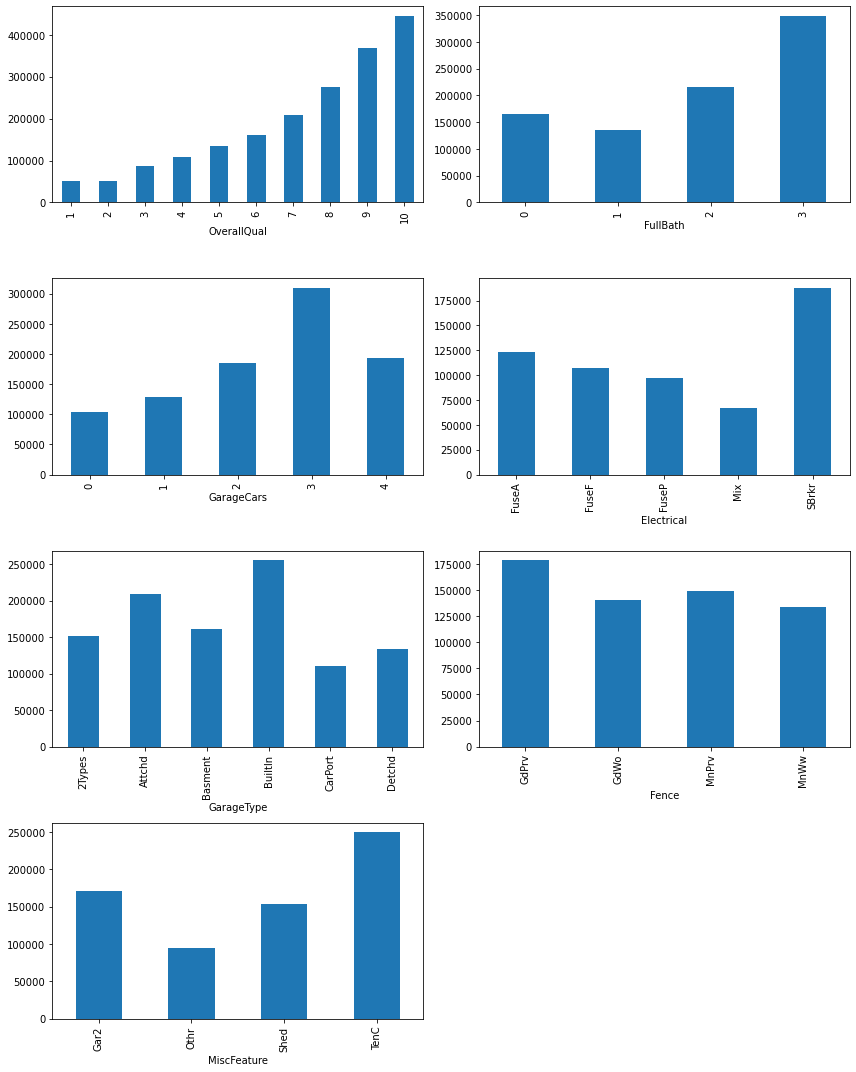

In [225]:
nrows = 4
ncols = 2
repeater = 1

plt.figure(figsize=(12,15))
for i in cats:
    plt.subplot(nrows,ncols,repeater)
    housing.groupby(by=i)['SalePrice'].mean().plot(kind='bar')
    repeater+=1
    
plt.tight_layout()
plt.show()

##### Treat the Defects in the DataSet
##### Treat the Missing Values and the Outliers

#### Missing Value Treatment

* Closest Fit
* Central Value Imputation
* Deletion

In [226]:
housing.isnull().sum()

OverallQual       0
YearBuilt         0
TotalBsmtSF       0
Electrical        1
GrLivArea         0
FullBath          0
GarageType      143
GarageCars        0
GarageArea        0
Fence          1148
MiscFeature    1366
SalePrice         0
dtype: int64

In [227]:
(housing.isnull().sum()/housing.shape[0])*100

OverallQual     0.000000
YearBuilt       0.000000
TotalBsmtSF     0.000000
Electrical      0.070522
GrLivArea       0.000000
FullBath        0.000000
GarageType     10.084626
GarageCars      0.000000
GarageArea      0.000000
Fence          80.959097
MiscFeature    96.332863
SalePrice       0.000000
dtype: float64

In [228]:
((housing.isnull().sum()/housing.shape[0])*100).sort_values(ascending=False)

MiscFeature    96.332863
Fence          80.959097
GarageType     10.084626
Electrical      0.070522
OverallQual     0.000000
YearBuilt       0.000000
TotalBsmtSF     0.000000
GrLivArea       0.000000
FullBath        0.000000
GarageCars      0.000000
GarageArea      0.000000
SalePrice       0.000000
dtype: float64

In [229]:
housing[housing['GarageType'].isnull()]

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
8,5,1939,991,SBrkr,1077,1,NaN,1,205,NaN,NaN,118000
22,5,1968,1060,SBrkr,1060,1,NaN,1,270,MnPrv,NaN,154000
26,5,1957,1484,SBrkr,1600,1,NaN,1,319,NaN,NaN,207500
37,4,1955,0,FuseP,1152,2,NaN,0,0,NaN,NaN,82000
39,5,1959,1350,SBrkr,1328,1,NaN,1,308,NaN,NaN,170000
...,...,...,...,...,...,...,...,...,...,...,...,...
1387,5,1940,788,SBrkr,804,1,NaN,1,240,MnPrv,NaN,119000
1407,5,1970,630,SBrkr,630,1,NaN,0,0,NaN,NaN,92000
1408,5,1974,896,SBrkr,1792,2,NaN,0,0,NaN,NaN,136000
1411,5,2006,1140,SBrkr,1140,1,NaN,0,0,NaN,NaN,84500


In [230]:
housing['GarageType'] = np.where((housing['GarageCars']==0)&\
                                (housing['GarageArea']==0), 'NoGarage', housing['GarageType'])

In [231]:
housing[housing['GarageType'].isnull()]

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
8,5,1939,991,SBrkr,1077,1,NaN,1,205,NaN,NaN,118000
22,5,1968,1060,SBrkr,1060,1,NaN,1,270,MnPrv,NaN,154000
26,5,1957,1484,SBrkr,1600,1,NaN,1,319,NaN,NaN,207500
39,5,1959,1350,SBrkr,1328,1,NaN,1,308,NaN,NaN,170000
47,5,1966,955,SBrkr,955,1,NaN,1,386,MnPrv,NaN,127000
...,...,...,...,...,...,...,...,...,...,...,...,...
1263,6,1942,771,SBrkr,1494,1,NaN,1,213,NaN,NaN,177500
1317,5,1966,864,SBrkr,892,1,NaN,1,264,GdWo,NaN,110000
1357,5,1950,1208,FuseA,1904,1,NaN,1,240,GdPrv,NaN,138000
1387,5,1940,788,SBrkr,804,1,NaN,1,240,MnPrv,NaN,119000


In [232]:
housing[housing['GarageCars']==1]['GarageType'].mode()

0    Detchd
Name: GarageType, dtype: object

In [233]:
housing[housing['GarageCars']==1]['GarageType'].value_counts()

Detchd     178
Attchd     105
BuiltIn      8
Basment      8
CarPort      3
Name: GarageType, dtype: int64

In [234]:
housing['GarageType'].mode()

0    Attchd
Name: GarageType, dtype: object

In [235]:
housing['GarageType'] = np.where(housing['GarageType'].isnull(), 'Detchd', housing['GarageType'])

In [236]:
housing[housing['GarageType'].isnull()]

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice


In [237]:
housing[housing['Electrical'].isnull()]

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
1339,5,2006,384,NaN,1394,2,BuiltIn,2,400,NaN,NaN,167500


In [238]:
housing['Electrical'].mode()

0    SBrkr
Name: Electrical, dtype: object

In [239]:
housing['Electrical'].mode()[0]

'SBrkr'

In [240]:
housing['Electrical'].fillna(housing['Electrical'].mode()[0], inplace=True)

In [241]:
housing[housing['Electrical'].isnull()]

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice


#### Lets Delete MiscFeature and Fence

In [242]:
housing.drop(columns=['Fence', 'MiscFeature'], inplace=True)

In [243]:
((housing.isnull().sum()/housing.shape[0])*100).sort_values(ascending=False)

OverallQual    0.0
YearBuilt      0.0
TotalBsmtSF    0.0
Electrical     0.0
GrLivArea      0.0
FullBath       0.0
GarageType     0.0
GarageCars     0.0
GarageArea     0.0
SalePrice      0.0
dtype: float64

#### Outlier Treatment

In [244]:
# GrLivArea

housing[housing['GrLivArea']>5000]

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
1260,10,2008,6110,SBrkr,5642,2,Attchd,2,1418,160000


In [245]:
# TotalBsmtSF

housing[housing['TotalBsmtSF']>6000]

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
1260,10,2008,6110,SBrkr,5642,2,Attchd,2,1418,160000


In [246]:
# Sale Price

housing[housing['SalePrice']>700000]

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
665,10,1994,2444,SBrkr,4316,3,Attchd,3,832,755000
1147,10,1996,2396,SBrkr,4476,3,Attchd,3,813,745000


In [247]:
# We can drop these three points

housing.drop(index=[1260,665,1147], inplace=True)

In [248]:
housing

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
0,7,2003,856,SBrkr,1710,2,Attchd,2,548,208500
1,6,1976,1262,SBrkr,1262,2,Attchd,2,460,181500
2,7,2001,920,SBrkr,1786,2,Attchd,2,608,223500
3,7,1915,756,SBrkr,1717,1,Detchd,3,642,140000
4,8,2000,1145,SBrkr,2198,2,Attchd,3,836,250000
...,...,...,...,...,...,...,...,...,...,...
1413,6,1999,953,SBrkr,1647,2,Attchd,2,460,175000
1414,6,1978,1542,SBrkr,2073,2,Attchd,2,500,210000
1415,7,1941,1152,SBrkr,2340,2,Attchd,1,252,266500
1416,5,1950,1078,FuseA,1078,1,Detchd,1,240,142125


<AxesSubplot:>

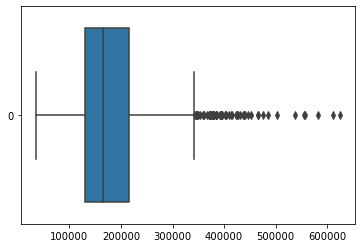

In [249]:
sns.boxplot(data = housing['SalePrice'], orient='h')

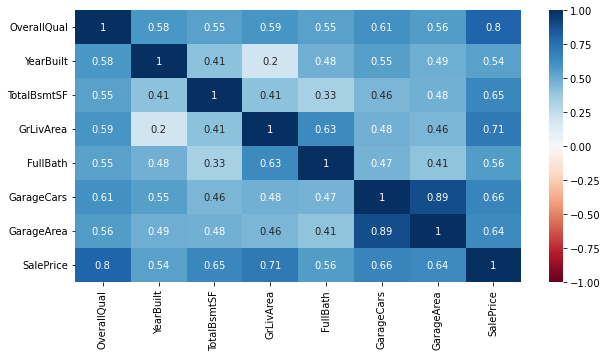

In [250]:
plt.figure(figsize = (10,5))

sns.heatmap(housing.corr(), annot=True, vmax=1, vmin=-1, cmap='RdBu')
plt.show()

##### Treat all the object datatypes with appropriate encoding technique

* One Hot Encoding
* Dummy Encoding
* Label Encoding
* Target Encoding
* Frequency Encoding

In [251]:
housing[housing.select_dtypes('object').columns]

,Electrical,GarageType
0,SBrkr,Attchd
1,SBrkr,Attchd
2,SBrkr,Attchd
3,SBrkr,Detchd
4,SBrkr,Attchd
...,...,...
1413,SBrkr,Attchd
1414,SBrkr,Attchd
1415,SBrkr,Attchd
1416,FuseA,Detchd


In [252]:
housing['GarageType'].value_counts()

Attchd      797
Detchd      416
BuiltIn      87
NoGarage     81
Basment      19
CarPort       9
2Types        6
Name: GarageType, dtype: int64

In [253]:
housing['Electrical'].value_counts()

SBrkr    1298
FuseA      89
FuseF      24
FuseP       3
Mix         1
Name: Electrical, dtype: int64

## LI DAY 02


### Train Test Split

In [255]:
from sklearn.model_selection import train_test_split

In [256]:
x = housing.drop(columns=['SalePrice'])
y = housing['SalePrice']

In [257]:
housing.shape

(1415, 10)

In [258]:
train_x, test_x, train_y, test_y = train_test_split(x,y,train_size=0.75)

In [259]:
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1061, 9) (354, 9) (1061,) (354,)


### Scaling

In [260]:
from sklearn.preprocessing import StandardScaler

In [261]:
sc = StandardScaler()

In [264]:
for i in num_cols:
    if i != 'SalePrice':
        sc = StandardScaler()
        train_x[i] = sc.fit_transform(pd.DataFrame(train_x[i]))
        test_x[i] = sc.fit_transform(pd.DataFrame(test_x[i]))

In [265]:
train_x

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea
919,5,-0.736965,-0.476873,SBrkr,-1.283678,1,Detchd,2,1.183561
1261,5,-0.437430,0.450964,SBrkr,-0.521979,1,Attchd,1,-0.811232
130,7,1.093528,1.636263,SBrkr,0.451082,2,Attchd,2,0.895157
125,5,-0.171176,0.373239,SBrkr,-0.585786,2,Detchd,1,-0.748745
691,5,0.028514,0.280941,SBrkr,-0.657569,1,Attchd,2,-0.167130
...,...,...,...,...,...,...,...,...,...
1291,7,0.860556,-0.304422,SBrkr,0.247697,2,Attchd,2,-0.056575
1209,6,0.394612,-1.154534,SBrkr,0.718275,3,BuiltIn,2,0.015526
285,7,-3.066683,0.995035,SBrkr,3.958489,3,Attchd,3,1.904571
676,8,1.126809,0.421817,SBrkr,2.130012,2,BuiltIn,3,0.923998


In [266]:
test_x

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea
439,8,1.307953,-0.507129,SBrkr,0.792922,2,BuiltIn,2,0.376933
1067,5,0.041973,-0.224739,SBrkr,-1.122861,1,Detchd,1,-0.795018
941,7,1.241322,0.919181,SBrkr,-0.193172,2,Attchd,2,0.066711
1158,6,0.974800,0.430981,SBrkr,-0.589943,2,Attchd,2,-0.269363
978,5,-0.157918,-2.498219,SBrkr,0.265838,2,NoGarage,0,-2.001439
...,...,...,...,...,...,...,...,...,...
1305,7,1.208007,-0.756015,SBrkr,-0.138713,2,Attchd,2,-0.105635
1102,6,-0.657647,-0.028501,FuseA,-0.535484,1,Attchd,1,-0.760549
111,6,-0.391125,0.086369,SBrkr,-0.870017,1,Detchd,1,-0.760549
773,4,-1.790365,0.363973,FuseA,-0.644402,1,Detchd,2,-0.105635


### Statistical Analysis

Key Inferences : SalePrice is highly affected

* OverallQual   - Cat
* GrLivArea     - Num
* GarageArea    - Num
* TotalBsmtSF   - Num
* FullBath      - Cat

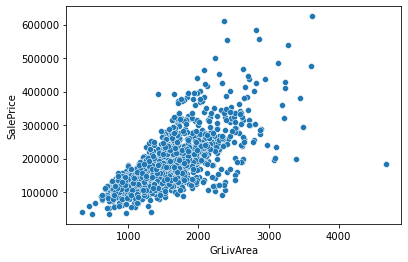

In [267]:
# SalePrice & GrLivArea

sns.scatterplot(x=housing['GrLivArea'], y=housing['SalePrice'])
plt.show()

#### Two Sample T-test (test fr independence)
##### Assumption : Data must be normal, smaples must have equal variances..

In [283]:
from scipy.stats import shapiro, levene, mannwhitneyu, pearsonr, kruskal

In [273]:
# Normality

p = shapiro(housing['SalePrice'])[1]
if p > 0.05:
    print('Ho: The data is normal')
else:
    print('Ha: The data is not normal')

Ha: The data is not normal


In [274]:
# In this case we have to use non parametric (mann-whitneyu) test

p = mannwhitneyu(housing['SalePrice'], housing['GrLivArea'])[1]
if p > 0.05:
    print('Ho: The two samples are independent')
else:
    print('Ha: The two samples are dependent')

Ha: The two samples are dependent


In [276]:
# pearsons corr test

p = pearsonr(housing['SalePrice'], housing['GrLivArea'])[1]
if p > 0.05:
    print('Ho: The two samples are non correlated')
else:
    print('Ha: The two samples are correlated')

Ha: The two samples are correlated


<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

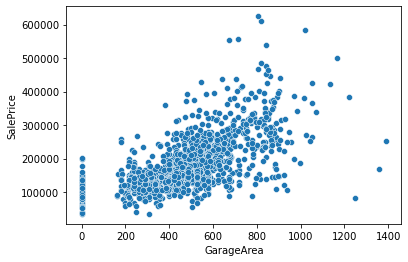

In [278]:
# SalePrice and GarageArea

sns.scatterplot(x=housing['GarageArea'], y=housing['SalePrice'])

In [279]:
# pearsons corr test

p = pearsonr(housing['SalePrice'], housing['GarageArea'])[1]
if p > 0.05:
    print('Ho: The two samples are non correlated')
else:
    print('Ha: The two samples are correlated')

Ha: The two samples are correlated


In [281]:
# BuildQuality and SalePrice

In [282]:
# For CAT vs NUM  :  Anova ~ Kruskal Wallis (non parametric) 

In [285]:
# Samples

housing['OverallQual'].value_counts()

samp1 = housing[housing['OverallQual']==1]['SalePrice']
samp2 = housing[housing['OverallQual']==2]['SalePrice']
samp3 = housing[housing['OverallQual']==3]['SalePrice']
samp4 = housing[housing['OverallQual']==4]['SalePrice']
samp5 = housing[housing['OverallQual']==5]['SalePrice']
samp6 = housing[housing['OverallQual']==6]['SalePrice']
samp7 = housing[housing['OverallQual']==7]['SalePrice']
samp8 = housing[housing['OverallQual']==8]['SalePrice']
samp9 = housing[housing['OverallQual']==9]['SalePrice']
samp10 = housing[housing['OverallQual']==10]['SalePrice']

In [288]:
kruskal(samp1,samp2, samp3,samp4,samp5,samp6,samp7,samp8,samp9,samp10)[1]

if p > 0.05:
    print('Ho: There is no relation b/w columns')
else:
    print('Ha: There is significant relation b/w columns')

Ha: There is significant relation b/w columns


## Analysing Fence and Misc Features

In [289]:
# Original Dataset

df = pd.read_csv(r"E:\TABLES\housing data-1.csv")

In [290]:
df.head()

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
0,1,7,2003,856,SBrkr,1710,2,Attchd,2,548,NaN,NaN,208500
1,2,6,1976,1262,SBrkr,1262,2,Attchd,2,460,NaN,NaN,181500
2,3,7,2001,920,SBrkr,1786,2,Attchd,2,608,NaN,NaN,223500
3,4,7,1915,756,SBrkr,1717,1,Detchd,3,642,NaN,NaN,140000
4,5,8,2000,1145,SBrkr,2198,2,Attchd,3,836,NaN,NaN,250000


In [291]:
df['Fence'].value_counts()

MnPrv    148
GdPrv     58
GdWo      53
MnWw      11
Name: Fence, dtype: int64

In [292]:
df['Fence'] = np.where(df['Fence'].isnull(), 'No', 'Yes')

In [293]:
df['Fence'].value_counts()

No     1148
Yes     270
Name: Fence, dtype: int64

In [297]:
samp1 = df[df['Fence']=='Yes']['SalePrice']
samp2 = df[df['Fence']=='No']['SalePrice']

p = mannwhitneyu(samp1,samp2)[1]
if p>0.05:
    print('Ho: mu1 = mu2')
else:
    print('Ha: mu1 != mu2')

Ha: mu1 != mu2


<AxesSubplot:xlabel='Fence', ylabel='SalePrice'>

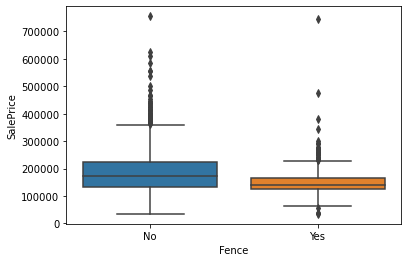

In [301]:
sns.boxplot(df['Fence'],df['SalePrice'])

In [296]:
df['MiscFeature'].value_counts()

Shed    47
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [298]:
df['MiscFeature'] = np.where(df['MiscFeature'].isnull(), 'No', 'Yes')

In [299]:
df['MiscFeature'].value_counts()

No     1366
Yes      52
Name: MiscFeature, dtype: int64

In [300]:
samp1 = df[df['MiscFeature']=='Yes']['SalePrice']
samp2 = df[df['MiscFeature']=='No']['SalePrice']

p = mannwhitneyu(samp1,samp2)[1]
if p>0.05:
    print('Ho: mu1 = mu2')
else:
    print('Ha: mu1 != mu2')

Ha: mu1 != mu2


<AxesSubplot:xlabel='MiscFeature', ylabel='SalePrice'>

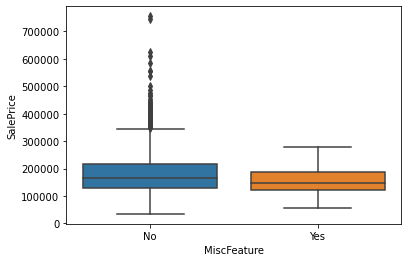

In [302]:
sns.boxplot(df['MiscFeature'],df['SalePrice'])